In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42


In [2]:
## Lithospheric input
heatin = 177

## Observations, conductive, and iso simulations
obs = pd.read_csv("ISO_aq600/NP_allData.txt")['tM']/heatin
p9 = pd.read_csv("ISO_aq600/p9r3DITtest_run.01257.HO2P")['q']/heatin
p10 = pd.read_csv("ISO_aq600/p10r_run.00019.HO2P")['q']/heatin


## One order perm contrast
p9p9p10 = pd.read_csv("ANISO_aq600/p9p9p10_run.00497.HO2P")['q']/heatin
p9p10p10 =  pd.read_csv("ANISO_aq600/p9p10p10_run.00511.HO2P")['q']/heatin
p10p9p10 = pd.read_csv("ANISO_aq600/p10p9p10_run.00525.HO2P")['q']/heatin
p10p9p9 = pd.read_csv("ANISO_aq600/p10p9p9_run.00091.HO2P")['q']/heatin

## Two order perm contrast
p9p9p11 = pd.read_csv("ANISO_aq600/p9p9p11_run.00447.HO2P")['q']/heatin
p9p11p11 = pd.read_csv("ANISO_aq600/p9p11p11_run.00252.HO2P")['q']/heatin
p11p9p11 = pd.read_csv("ANISO_aq600/p11p9p11_run.00468.HO2P")['q']/heatin
p11p9p9 = pd.read_csv("ANISO_aq600/p11p9p9_run.00434.HO2P")['q']/heatin

## Half order perms
p9d3p9d3p10 = pd.read_csv("ANISO_aq600/p9d3p9d3p10_run.00357.HO2P")['q']/heatin
p9d3p10p10 = pd.read_csv("ANISO_aq600/p9d3p10p10_run.00365.HO2P")['q']/heatin


In [4]:
obs = pd.read_csv("ISO_aq600/NP_allData.txt")['tM']
obs

0       27.0893
1       33.7698
2       43.8476
3       47.0536
4       39.2628
         ...   
140    141.9000
141    146.2000
142    224.4000
143     46.4000
144     43.0000
Name: tM, Length: 145, dtype: float64

In [18]:
df = pd.DataFrame([obs,p9,p10,p9p9p10,p9p10p10,p10p9p10,p10p9p9,p9p9p11,p9p11p11,p11p9p11,p11p9p9,p9d3p9d3p10,p9d3p10p10]).transpose()



df.columns  = ['obs',
                   'p9',
                  'p10',
                  'p9p9p10',
                  'p9p10p10',
                  'p10p9p10',
                  'p10p9p9',
                  'p9p9p11',
                  'p9p11p11',
                  'p11p9p11',
                  'p11p9p9',
                  'p9d3p9d3p10',
                  'p9d3p10p10'
              ]
df = df.melt()

In [10]:
## Define colors

# OKeeffe1 = ["#7db0ea","#f6f2ee","#6b200c","#ee956a","#225bb2","#da6c42","#133e7e","#fbc2a9","#973d21","#bad6f9","#447fdd"];
# df_cols = {'obs':'#000000',
#            'p9':'#5D87CB',
#            'p10':"#5D87CB",
#            'p9p9p10':'#6b200c',
#            'p9p10p10':'#7db0ea',
#            'p10p9p10':'#447fdd',
#            'p10p9p9':"#ee956a",
#            'p9p9p11':'#133e7e',
#            'p9p11p11':'#bad6f9',
#            'p11p9p11':'#973d21',
#            'p11p9p9':'#fbc2a9',
#            'p9d3p9d3p10':'#da6c42',
#            'p9d3p10p10':'#225bb2'
#           }

df_cols = {'obs':'#000000',
           'p9':'#5D87CB',
           'p10':"#5D87CB",
           'p9p9p10':'#5E8A28',
           'p9p10p10':'#5E8A28',
           'p10p9p10':'#5E8A28',
           'p10p9p9':"#5E8A28",
           'p9p9p11':'#BE7437',
           'p9p11p11':'#BE7437',
           'p11p9p11':'#BE7437',
           'p11p9p9':'#BE7437',
           'p9d3p9d3p10':'#C64339',
           'p9d3p10p10':'#C64339'
          }

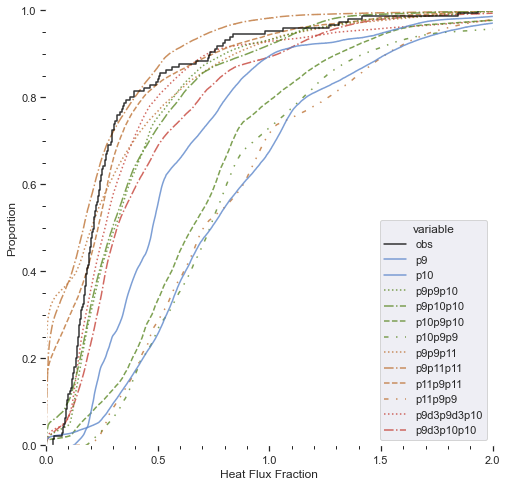

In [14]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
fig, ax = plt.subplots(ncols=1, figsize=(8, 8))
g = sns.ecdfplot(df, x="value", hue="variable",palette=df_cols,ax=ax,alpha = 0.8)
# for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
#                                            ['solid', 
#                                             'solid',
#                                             'solid',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashed',
#                                             'dashed'
#                                            ], ax.legend_.legendHandles):
#     lines.set_linestyle(linestyle)
#     legend_handle.set_linestyle(linestyle)
    
for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
                                       ['solid', 
                                        'solid',
                                        'solid',
                                       'dotted',
                                       'dashdot',
                                       'dashed',
                                       (0, (3, 5, 1, 5, 1, 5)),
                                       'dotted',
                                        'dashdot',
                                        'dashed',
                                        (0, (3, 5, 1, 5, 1, 5)),
                                        'dotted',
                                        'dashdot'
                                       ], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

ax.set_facecolor('white')
ax.minorticks_on()
plt.xlim(0,2)
plt.xlabel('Heat Flux Fraction')
plt.xticks([0,0.5,1,1.5,2.0])
plt.savefig("ECDF_all.pdf")

## 1 order and iso

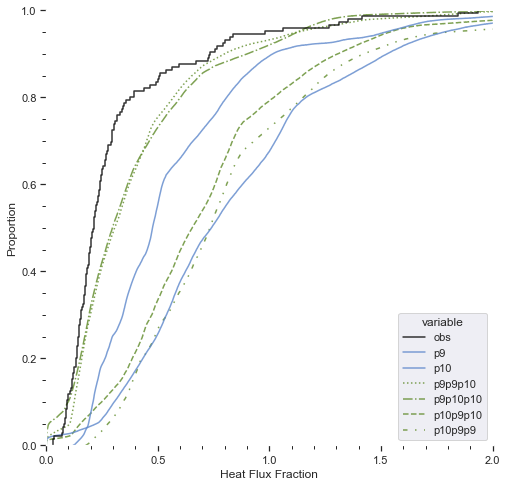

In [15]:
df = pd.DataFrame([obs,p9,p10,p9p9p10,p9p10p10,p10p9p10,p10p9p9]).transpose()



df.columns  = ['obs',
                   'p9',
                  'p10',
                  'p9p9p10',
                  'p9p10p10',
                  'p10p9p10',
                  'p10p9p9'
              ]
df = df.melt()




sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
fig, ax = plt.subplots(ncols=1, figsize=(8, 8))
g = sns.ecdfplot(df, x="value", hue="variable",palette=df_cols,ax=ax,alpha = 0.8)
# for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
#                                            ['solid', 
#                                             'solid',
#                                             'solid',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashed',
#                                             'dashed'
#                                            ], ax.legend_.legendHandles):
#     lines.set_linestyle(linestyle)
#     legend_handle.set_linestyle(linestyle)
    
for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
                                       ['solid', 
                                        'solid',
                                        'solid',
                                       'dotted',
                                       'dashdot',
                                       'dashed',
                                       (0, (3, 5, 1, 5, 1, 5))
                                       ], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

ax.set_facecolor('white')
ax.minorticks_on()
plt.xlim(0,2)
plt.xlabel('Heat Flux Fraction')
plt.xticks([0,0.5,1,1.5,2.0])
plt.savefig("ECDF_OneOrder.pdf")

## Two and 0.5 orders

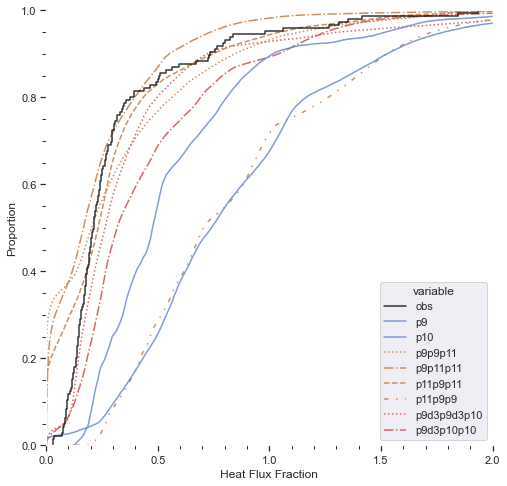

In [16]:
df = pd.DataFrame([obs,p9,p10,p9p9p11,p9p11p11,p11p9p11,p11p9p9,p9d3p9d3p10,p9d3p10p10]).transpose()



df.columns  = ['obs',
                   'p9',
                  'p10',
                  'p9p9p11',
                  'p9p11p11',
                  'p11p9p11',
                  'p11p9p9',
                  'p9d3p9d3p10',
                  'p9d3p10p10'
              ]
df = df.melt()


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
fig, ax = plt.subplots(ncols=1, figsize=(8, 8))
g = sns.ecdfplot(df, x="value", hue="variable",palette=df_cols,ax=ax,alpha = 0.8)
# for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
#                                            ['solid', 
#                                             'solid',
#                                             'solid',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dotted',
#                                            'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashdot',
#                                             'dashed',
#                                             'dashed'
#                                            ], ax.legend_.legendHandles):
#     lines.set_linestyle(linestyle)
#     legend_handle.set_linestyle(linestyle)
    
for lines, linestyle, legend_handle in zip(ax.lines[::-1], 
                                       ['solid', 
                                        'solid',
                                        'solid',
                                       'dotted',
                                        'dashdot',
                                        'dashed',
                                        (0, (3, 5, 1, 5, 1, 5)),
                                        'dotted',
                                        'dashdot'
                                       ], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

ax.set_facecolor('white')
ax.minorticks_on()
plt.xlim(0,2)
plt.xlabel('Heat Flux Fraction')
plt.xticks([0,0.5,1,1.5,2.0])
plt.savefig("ECDF_Two_HalfOrder.pdf")

In [ ]:
df = pd.DataFrame([obs,p9,p10,p9p9p10,p9p10p10,p10p9p10,p10p9p9,p9p9p11,p9p11p11,p11p9p11,p11p9p9,p9d3p9d3p10,p9d3p10p10]).transpose()



df.columns  = ['obs',
                   'p9',
                  'p10',
                  'p9p9p10',
                  'p9p10p10',
                  'p10p9p10',
                  'p10p9p9',
                  'p9p9p11',
                  'p9p11p11',
                  'p11p9p11',
                  'p11p9p9',
                  'p9d3p9d3p10',
                  'p9d3p10p10'
              ]
df = df.melt()

/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


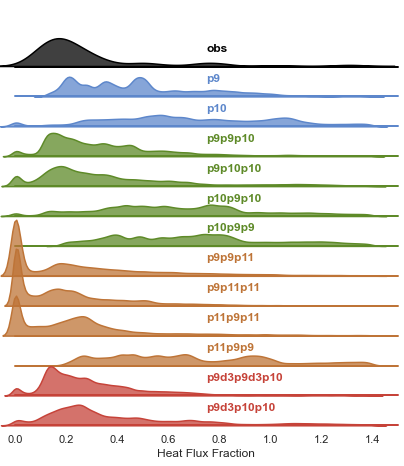

In [19]:
tt = df[(df['value']<=1.4) & (df['value']>0)]

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
t = sns.FacetGrid(tt, row="variable", hue="variable", aspect=12, height=.5, palette=df_cols)

# Draw the densities in a few steps
t.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=.75, linewidth=1.5)
# t.map(sns.kdeplot, "value", clip_on=False, color="w", lw=.5, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
t.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(.5, .3, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    ax.set_xlim(0,1.5)


t.map(label, "value")

# Set the subplots to overlap
t.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
t.set_titles("")
t.set(yticks=[], ylabel="")
t.despine(bottom=True, left=True)
t.set_xlabels("Heat Flux Fraction")
t.savefig("Ridgeplot_Final.pdf")